In [50]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import plotly.express as px
import panel as pn
import hvplot.pandas
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt import expected_returns
%matplotlib inline


In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set the ticker "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY" . These are the top 10 fintech stock found in Referenc: Motley fool , 
# 
tickers =["SQ","ATV","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_portfolio_year = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



ticker =["SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for S&P 500
df_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df


In [5]:
#Second Investment Portfolio datafram
existing_investment_df = pd.read_csv("Investment_Tracker.csv")
existing_investment_df

,Company,Category,Shares,Price,Change,Change (%),Portfolio %,Value
0,AAPL,US Stocks,"1,200",$143.16,$0.24,0.17%,7%,"$171,792.00"
1,NKE,Bonds,"1,300",$135.09,($2.45),-1.78%,8%,"$175,617.00"
2,GLW,International Stocks,"1,200",$37.18,($1.27),-3.30%,2%,"$44,616.00"
3,NEE,Cash,"10,000",$85.25,($1.75),-2.01%,37%,"$852,500.00"
4,IBM,Real Estate,125,$122.48,$3.86,3.25%,1%,"$15,310.00"
5,UIS,Commodities,100,$24.58,$0.63,2.63%,0%,"$2,458.00"
6,TROX,Commodities,250,$16.42,($0.12),-0.73%,0%,"$4,105.00"
7,BND,Bonds,275,$87.57,($0.01),-0.01%,1%,"$24,081.75"
8,MSFT,US Stocks,"2,000",$232.33,$2.80,1.22%,20%,"$464,660.00"
9,JNJ,NaN,"1,000",$170.48,$4.61,2.78%,7%,"$170,480.00"


In [6]:
# Create and empty DataFrame for closing prices for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of "SQ","ADYEY","MELI","GDOT","PYPL","FISV","GS","V","AXP","SPY"
df_closing_prices["SQ"] = df_portfolio_year["SQ"]["close"]
df_closing_prices["ATV"] = df_portfolio_year["ATV"]["close"]
df_closing_prices["MELI"] = df_portfolio_year["MELI"]["close"]
df_closing_prices["GDOT"] = df_portfolio_year["GDOT"]["close"]
df_closing_prices["PYPL"] = df_portfolio_year["PYPL"]["close"]
df_closing_prices["FISV"] = df_portfolio_year["FISV"]["close"]
df_closing_prices["GS"] = df_portfolio_year["GS"]["close"]
df_closing_prices["V"] = df_portfolio_year["V"]["close"]
df_closing_prices["AXP"] = df_portfolio_year["AXP"]["close"]
df_closing_prices["PFE"] = df_portfolio_year["PFE"]["close"]
df_closing_prices["SPY"] = df_sp500["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date


In [7]:
# Compute daily returns after cleaning the null values if any
df_daily_returns = df_closing_prices.pct_change().dropna()

In [1]:
# Plot daily returns for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
daily_returns_plot = df_daily_returns.plot(title="Daily Returns of SQ, ATV, MELI, GDOT, PYPL, FISV, PFE, GS, V, XP, SPY over the Last Year", rot=90, figsize = (15,10))
daily_returns_plot

NameError: name 'df_daily_returns' is not defined

In [9]:
# Running simulations on top 10 fintech stocks along with SPY
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_all = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10],
    num_simulation = num_sims,
    num_trading_days = 252
)


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

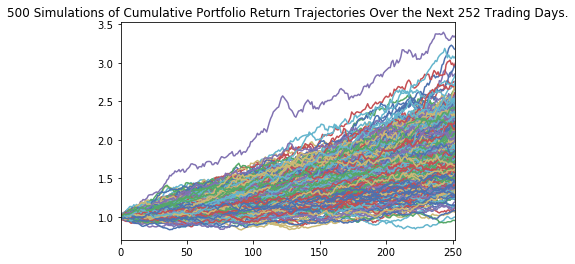

In [10]:
# Create line plot of cumulative returns for our portfolio
all_line_plot = MC_simulation_all.plot_simulation()
stock_returns_simulated = all_line_plot.get_figure().savefig("Simulated Returns of Fintech Stocks line", bbox_inches = "tight")

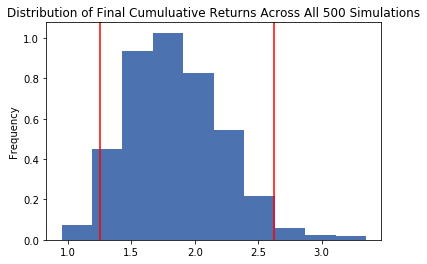

In [11]:
# Create distribution plot of cumulative returns for our portfolio
all_dist_plot = MC_simulation_all.plot_distribution()
stock_returns_simulated2 = all_dist_plot.get_figure().savefig("Simulated Returns of Fintech Stocks dist", bbox_inches = "tight")

In [12]:
# Running simulations on S&P 500
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_spy = MCSimulation(
    portfolio_data = df_sp500,
    weights = [1],
    num_simulation = num_sims,
    num_trading_days = 252
)


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

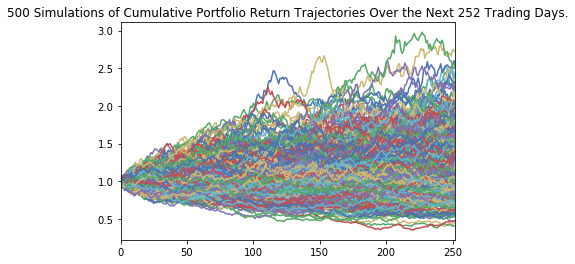

In [13]:
# Create line plot of cumulative returns for SPY
spy_line_plot = MC_simulation_spy.plot_simulation()
spy_returns_simulated = spy_line_plot.get_figure().savefig("Simulated Returns of S&P 500 line", bbox_inches = "tight")
spy_returns_simulated

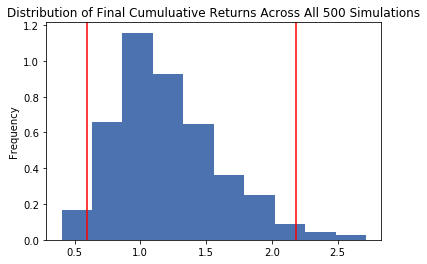

In [14]:
# Create distribution plot of cumulative returns for SPY
spy_dist_plot = MC_simulation_spy.plot_distribution()
spy_returns_simulated2 = spy_dist_plot.get_figure().savefig("Simulated Returns of S&P 500 dist", bbox_inches = "tight")

In [15]:
spy_bar = df_daily_returns.hvplot.bar(y="SPY", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of SPY", width = 1000) 
spy_bar

:Bars   [index]   (SPY)

In [16]:
sq_bar = df_daily_returns.hvplot.bar(y="SQ", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of SQ vs SPY", width = 1000) * spy_bar
sq_bar 

:Overlay
   .Bars.I  :Bars   [index]   (SQ)
   .Bars.II :Bars   [index]   (SPY)

In [17]:
atv_bar = df_daily_returns.hvplot.bar(y="ATV", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of ATV vs SPY", width = 1000) * spy_bar
atv_bar

:Overlay
   .Bars.I  :Bars   [index]   (ATV)
   .Bars.II :Bars   [index]   (SPY)

In [18]:
meli_bar = df_daily_returns.hvplot.bar(y="MELI", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of MELI vs SPY", width = 1000) * spy_bar
meli_bar

:Overlay
   .Bars.I  :Bars   [index]   (MELI)
   .Bars.II :Bars   [index]   (SPY)

In [19]:
gdot_bar = df_daily_returns.hvplot.bar(y="GDOT", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of GDOT vs SPY", width = 1000) * spy_bar
gdot_bar

:Overlay
   .Bars.I  :Bars   [index]   (GDOT)
   .Bars.II :Bars   [index]   (SPY)

In [20]:
pypl_bar = df_daily_returns.hvplot.bar(y="PYPL", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of PYPL vs SPY", width = 1000) * spy_bar
pypl_bar

:Overlay
   .Bars.I  :Bars   [index]   (PYPL)
   .Bars.II :Bars   [index]   (SPY)

In [21]:
fisv_bar = df_daily_returns.hvplot.bar(y="FISV", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of FISV vs SPY", width = 1000) * spy_bar
fisv_bar

:Overlay
   .Bars.I  :Bars   [index]   (FISV)
   .Bars.II :Bars   [index]   (SPY)

In [22]:
gs_bar = df_daily_returns.hvplot.bar(y="GS", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of GS vs SPY", width = 1000) * spy_bar
gs_bar

:Overlay
   .Bars.I  :Bars   [index]   (GS)
   .Bars.II :Bars   [index]   (SPY)

In [23]:
v_bar = df_daily_returns.hvplot.bar(y="V", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of V vs SPY", width = 1000) * spy_bar
v_bar

:Overlay
   .Bars.I  :Bars   [index]   (V)
   .Bars.II :Bars   [index]   (SPY)

In [24]:
axp_bar = df_daily_returns.hvplot.bar(y="AXP", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of AXP vs SPY", width = 1000) * spy_bar
axp_bar

:Overlay
   .Bars.I  :Bars   [index]   (AXP)
   .Bars.II :Bars   [index]   (SPY)

In [25]:
pfe_bar = df_daily_returns.hvplot.bar(y="PFE", rot = 90).opts(yformatter = "%.2f", title = "Daily Returns of PFE vs SPY", width = 1000) * spy_bar
pfe_bar

:Overlay
   .Bars.I  :Bars   [index]   (PFE)
   .Bars.II :Bars   [index]   (SPY)

In [26]:
#Getting the covariance of each Fintech stock
sq_covariance = df_daily_returns["SQ"].cov(df_daily_returns["SPY"])
atv_covariance = df_daily_returns["ATV"].cov(df_daily_returns["SPY"])
meli_covariance = df_daily_returns["MELI"].cov(df_daily_returns["SPY"])
gdot_covariance = df_daily_returns["GDOT"].cov(df_daily_returns["SPY"])
pypl_covariance = df_daily_returns["PYPL"].cov(df_daily_returns["SPY"])
fisv_covariance = df_daily_returns["FISV"].cov(df_daily_returns["SPY"])
gs_covariance = df_daily_returns["GS"].cov(df_daily_returns["SPY"])
v_covariance = df_daily_returns["V"].cov(df_daily_returns["SPY"])
axp_covariance = df_daily_returns["AXP"].cov(df_daily_returns["SPY"])
pfe_covariance = df_daily_returns["PFE"].cov(df_daily_returns["SPY"])
#Getting the variance of the S&P 500
variance = df_daily_returns["SPY"].var()

In [27]:
#Getting the Beta's of the Fintech Stocks
sq_beta = round(sq_covariance / variance , 2)
atv_beta = round(atv_covariance / variance, 2)
meli_beta = round(meli_covariance / variance, 2)
gdot_beta = round(gdot_covariance / variance, 2)
pypl_beta = round(pypl_covariance / variance, 2)
fisv_beta = round(fisv_covariance / variance, 2)
gs_beta = round(gs_covariance / variance, 2)
v_beta = round(v_covariance / variance, 2)
axp_beta = round(axp_covariance / variance, 2)
pfe_beta = round(pfe_covariance / variance, 2)

In [28]:
beta_df = pd.DataFrame()

In [29]:
beta_df["Stocks"] = tickers

In [30]:
beta_df["Betas"] = [sq_beta, atv_beta, meli_beta, gdot_beta, pypl_beta, fisv_beta, gs_beta, v_beta, axp_beta, pfe_beta]

In [31]:
beta_df.set_index(["Stocks"])

,Betas
Stocks,
SQ,1.43
ATV,0.73
MELI,1.01
GDOT,1.44
PYPL,1.17
FISV,1.16
PFE,1.28
GS,1.13
V,1.48


In [32]:
beta_chart = beta_df.hvplot.bar(y="Betas", x = "Stocks", title = "Beta's of Fintech Stocks", color = "green")
beta_chart

:Bars   [Stocks]   (Betas)

In [33]:
sq_sharpe = round((df_daily_returns["SQ"].mean() * 252) / (df_daily_returns["SQ"].std() * np.sqrt(252)), 2)
atv_sharpe = round((df_daily_returns["ATV"].mean() * 252) / (df_daily_returns["ATV"].std() * np.sqrt(252)), 2)
meli_sharpe = round((df_daily_returns["MELI"].mean() * 252) / (df_daily_returns["MELI"].std() * np.sqrt(252)), 2)
gdot_sharpe = round((df_daily_returns["GDOT"].mean() * 252) / (df_daily_returns["GDOT"].std() * np.sqrt(252)), 2)
pypl_sharpe = round((df_daily_returns["PYPL"].mean() * 252) / (df_daily_returns["PYPL"].std() * np.sqrt(252)), 2)
fisv_sharpe = round((df_daily_returns["FISV"].mean() * 252) / (df_daily_returns["FISV"].std() * np.sqrt(252)), 2)
gs_sharpe = round((df_daily_returns["GS"].mean() * 252) / (df_daily_returns["GS"].std() * np.sqrt(252)), 2)
v_sharpe = round((df_daily_returns["V"].mean() * 252) / (df_daily_returns["V"].std() * np.sqrt(252)), 2)
axp_sharpe = round((df_daily_returns["AXP"].mean() * 252) / (df_daily_returns["AXP"].std() * np.sqrt(252)), 2)
pfe_sharpe = round((df_daily_returns["PFE"].mean() * 252) / (df_daily_returns["PFE"].std() * np.sqrt(252)), 2)

In [34]:
sharpe_df = pd.DataFrame()

In [35]:
sharpe_df["Stocks"] = tickers

In [36]:
sharpe_df["Sharpe Ratio"] = [sq_sharpe, atv_sharpe, meli_sharpe, gdot_sharpe, pypl_sharpe, fisv_sharpe, gs_sharpe, v_sharpe, axp_sharpe, pfe_sharpe]

In [37]:
sharpe_df.set_index(["Stocks"])

,Sharpe Ratio
Stocks,
SQ,2.08
ATV,0.55
MELI,2.11
GDOT,1.49
PYPL,1.72
FISV,0.20
PFE,0.52
GS,0.57
V,0.27


In [38]:
sharpe_chart = sharpe_df.hvplot.bar(x="Stocks", y= "Sharpe Ratio", title = "Sharpe Ratio's for Fintech Stocks", color = "orange")
sharpe_chart

:Bars   [Stocks]   (Sharpe Ratio)

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] HoloViews(Overlay)
    [3] HoloViews(Overlay)
    [4] HoloViews(Overlay)
    [5] HoloViews(Overlay)
    [6] HoloViews(Overlay)
    [7] HoloViews(Overlay)
    [8] HoloViews(Overlay)
    [9] HoloViews(Overlay)
    [10] HoloViews(Overlay)
    [11] HoloViews(Overlay)
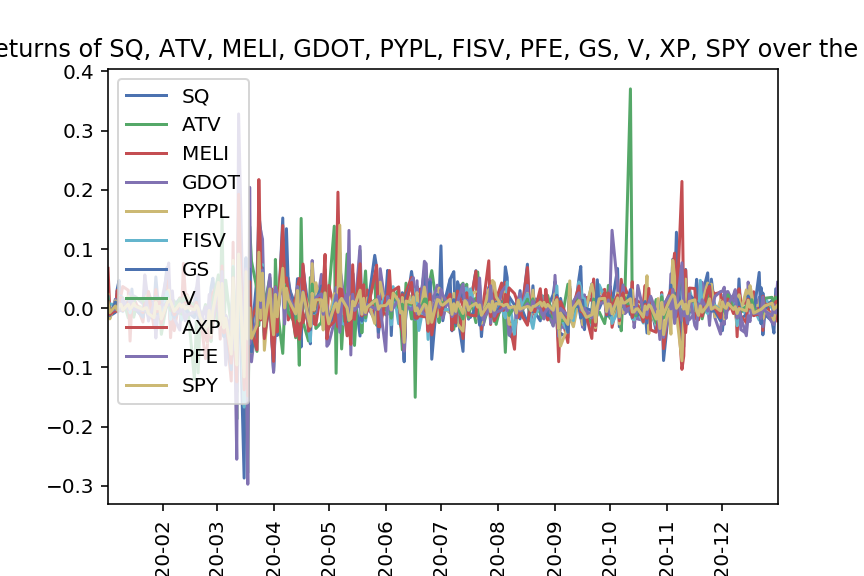

In [39]:
daily_return_column = pn.Column("## Daily Returns of Fintech Stocks vs S&P 500", daily_returns_plot.get_figure(), sq_bar, atv_bar, meli_bar, gdot_bar, pypl_bar, fisv_bar, gs_bar, v_bar, axp_bar, pfe_bar)
daily_return_column

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] Matplotlib(Figure)
    [3] Matplotlib(Figure)
    [4] Matplotlib(Figure)
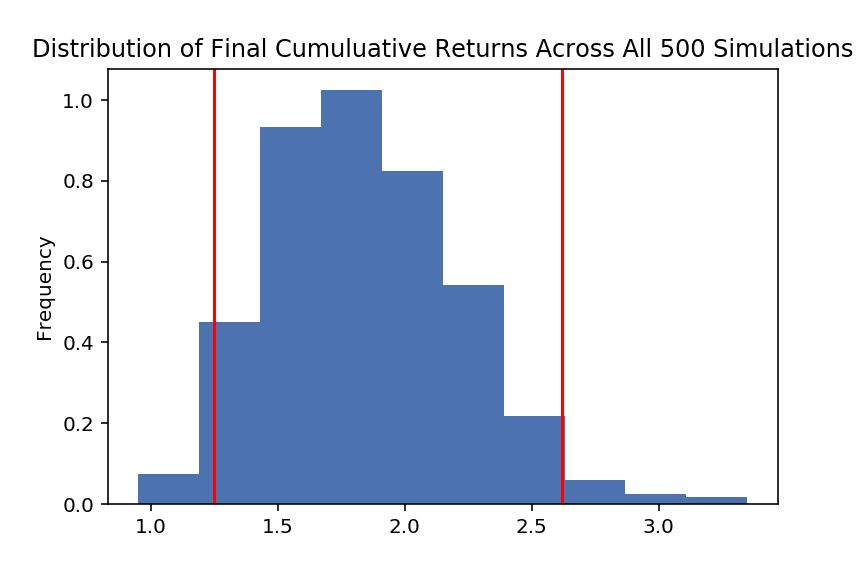
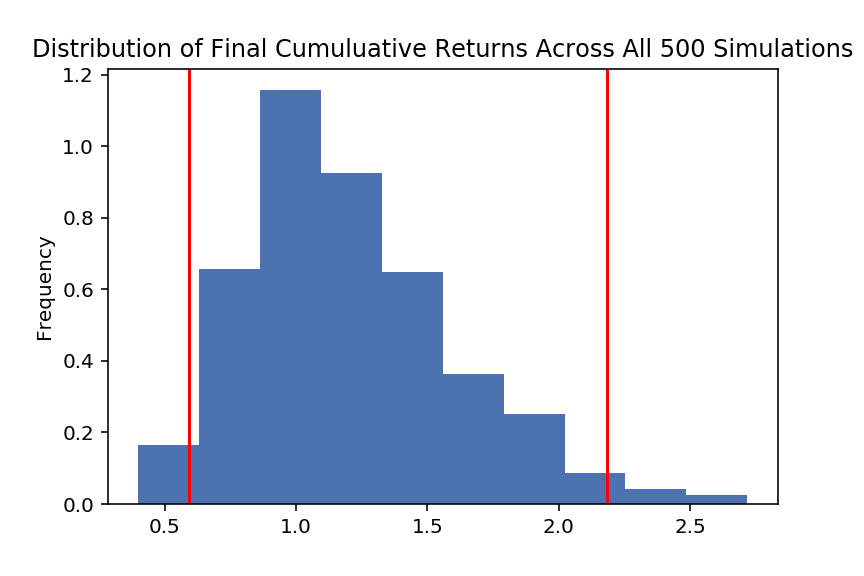
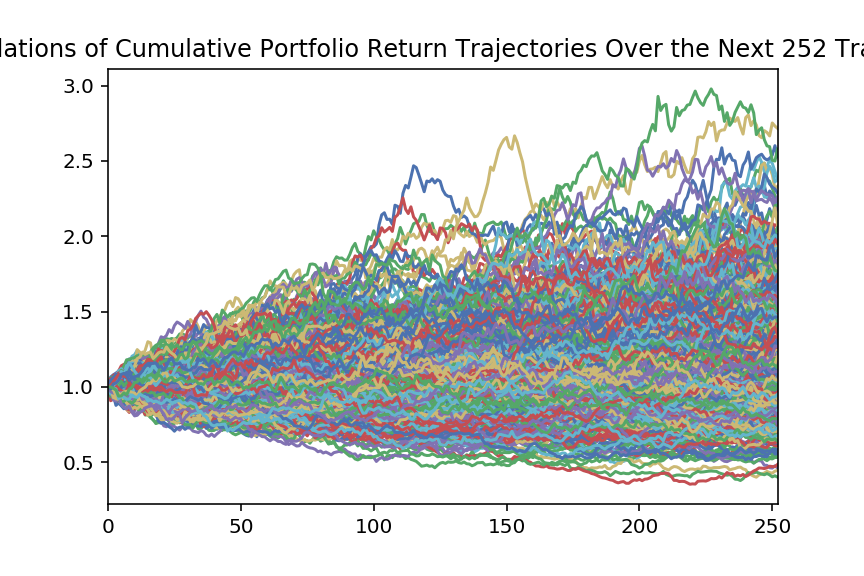
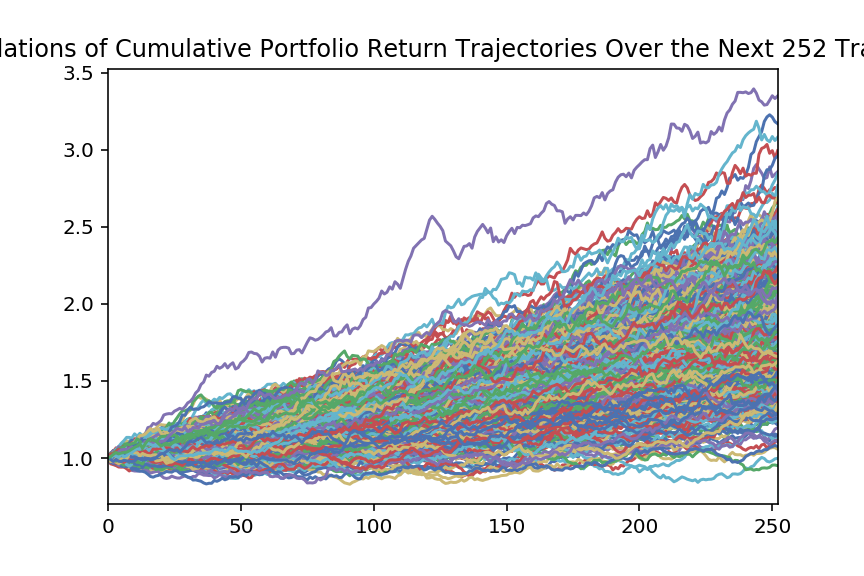

In [40]:
stock_return_analysis = pn.Column("## Simulated Cumulative Returns of Fintech Stocks and S&P 500", all_line_plot.get_figure(), all_dist_plot.get_figure(), spy_line_plot.get_figure(), spy_dist_plot.get_figure())
stock_return_analysis

In [41]:
riskiness_column = pn.Column("## Riskiness of Fintech Stocks", beta_chart, sharpe_chart)
riskiness_column

Column
    [0] Markdown(str)
    [1] HoloViews(Bars)
    [2] HoloViews(Bars)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] HoloViews(Overlay)
        [3] HoloViews(Overlay)
        [4] HoloViews(Overlay)
        [5] HoloViews(Overlay)
        [6] HoloViews(Overlay)
        [7] HoloViews(Overlay)
        [8] HoloViews(Overlay)
        [9] HoloViews(Overlay)
        [10] HoloViews(Overlay)
        [11] HoloViews(Overlay)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
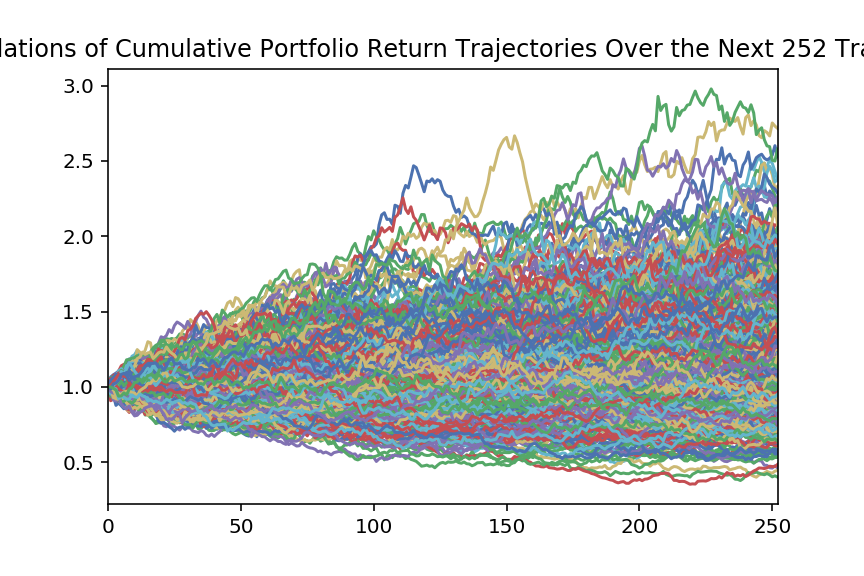
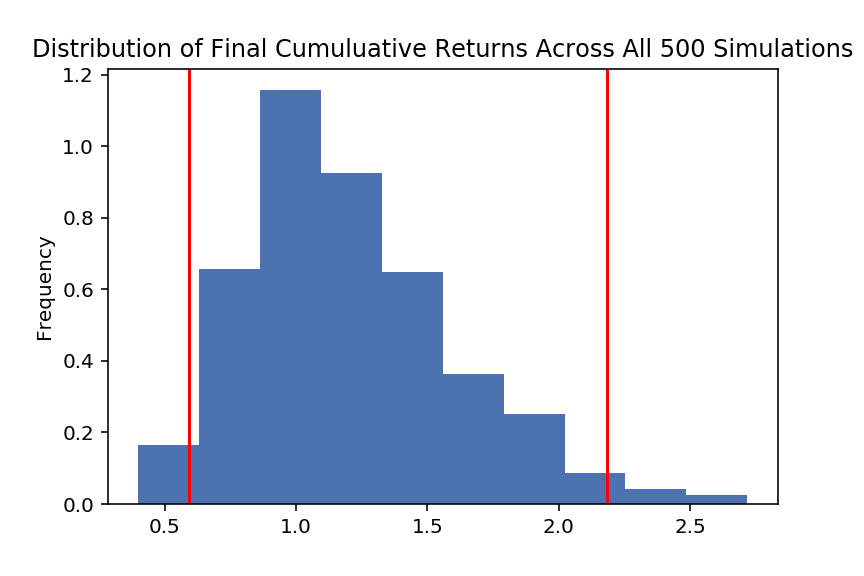
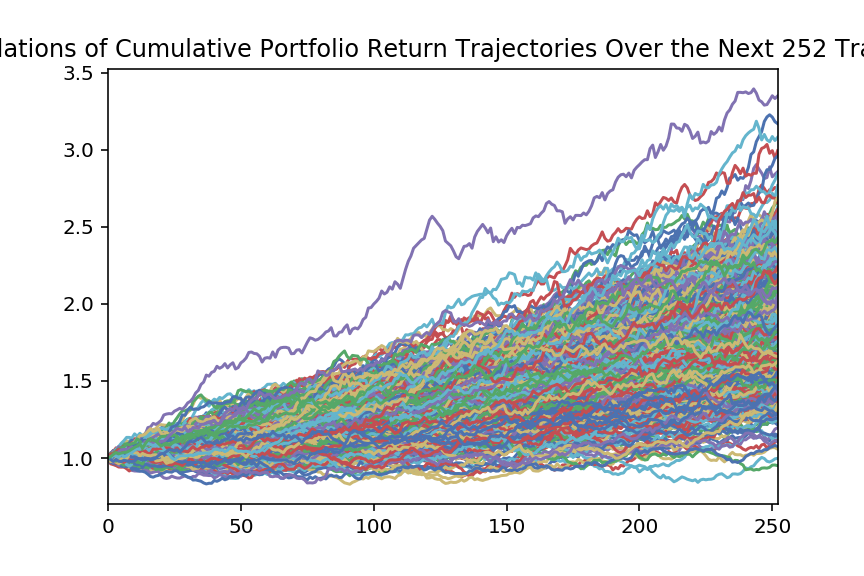
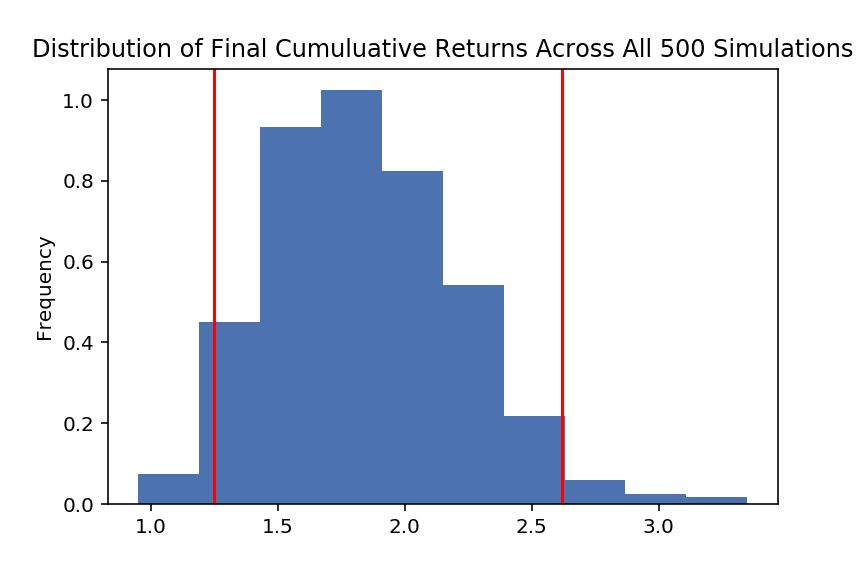
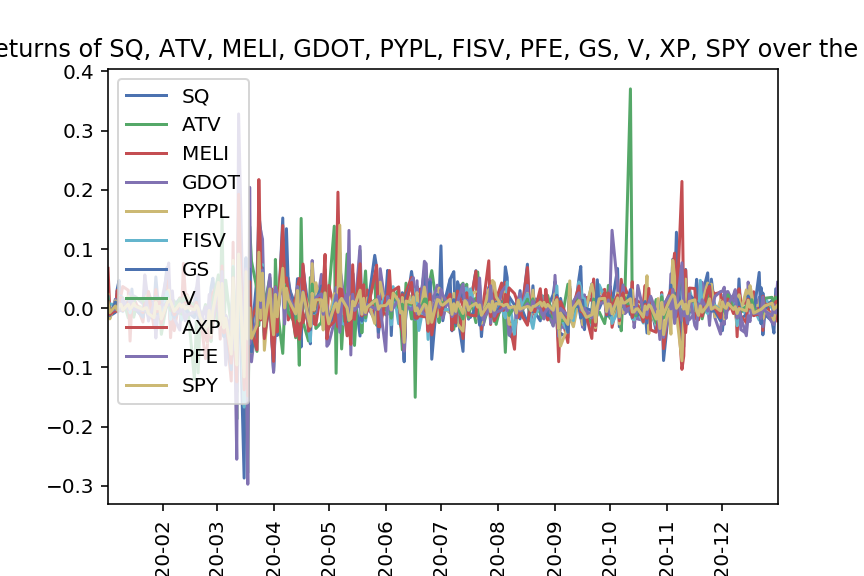

In [42]:
tabs = pn.Tabs(("Daily Returns", daily_return_column), ("Initial Simulations", stock_return_analysis), ("Analyzing Riskiness", riskiness_column))
tabs

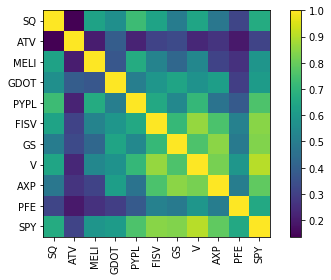

In [54]:
# Covariance plot of Fintech Stocks
cov = risk_models.sample_cov(df_closing_prices)
plotting.plot_covariance(cov, plot_correlation=True)

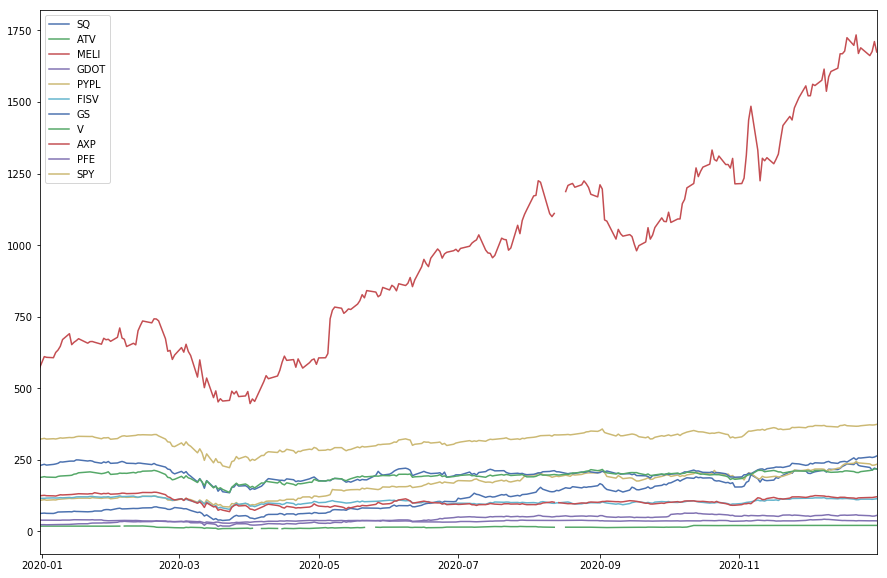

In [49]:
#Graph of closing prices for Fintech Stocks
df_closing_prices.plot(figsize=(15,10));

In [51]:
# Expected returns on Fintech Stocks
predicted_returns = expected_returns.capm_return(df_closing_prices)
predicted_returns

SQ      0.818068
ATV     0.560133
MELI    0.576975
GDOT    0.915922
PYPL    0.611486
FISV    0.599445
GS      0.644103
V       0.556918
AXP     0.759935
PFE     0.313712
SPY     0.472521
Name: mkt, dtype: float64

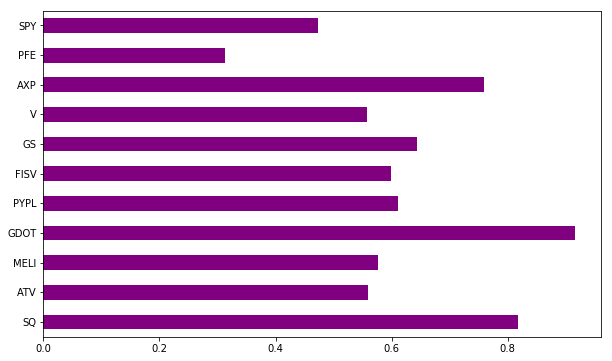

In [53]:
predicted_returns.plot.barh(figsize=(10,6), color = "purple", figsize=(15,10));